In [1]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [4]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [5]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
mon_str="06"
session.query(Measurement.tobs).filter(func.strftime("%m", Measurement.date) == mon_str).all()


[(78.0,),
 (76.0,),
 (78.0,),
 (76.0,),
 (77.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (77.0,),
 (82.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (76.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (73.0,),
 (70.0,),
 (76.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (78.0,),
 (77.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (75.0,),
 (76.0,),
 (76.0,),
 (77.0,),
 (78.0,),
 (76.0,),
 (77.0,),
 (75.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (75.0,),
 (77.0,),
 (77.0,),
 (76.0,),
 (78.0,),
 (77.0,),
 (76.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (77.0,),
 (77.0,),
 (78.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (76.0,),
 (75.0,),
 (76.0,),
 (76.0,),
 (77.0,),
 (76.0,),
 (73.0,),
 (73.0,),
 (75.0,),
 (77.0,),
 (76.0,),
 (77.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (79.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (77.0,),
 (78.0,),
 (77.0,),
 (76.0,),


In [6]:
#  3. Convert the June temperatures to a list.
june_temp_list=[]
mon_str="06"
june_temp_list=session.query(Measurement.tobs).filter(func.strftime("%m", Measurement.date) == mon_str).all()
 

In [7]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temp_df=pd.DataFrame(june_temp_list,columns=['Temperature'])
june_temp_df

,Temperature
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0
...,...
1695,79.0
1696,74.0
1697,74.0
1698,76.0


In [8]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temp_df.describe()

,Temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


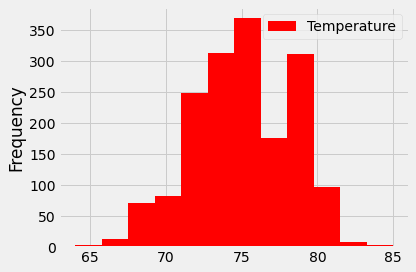

In [9]:
june_temp_df.plot.hist(bins=12,color='red')
plt.tight_layout()
plt.savefig("./IMAGES/june_hist.PNG")

## D2: Determine the Summary Statistics for December

In [10]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
mon_str="12"
session.query(Measurement.tobs).filter(func.extract("month", Measurement.date) == 12).all()

[(76.0,),
 (74.0,),
 (74.0,),
 (64.0,),
 (64.0,),
 (67.0,),
 (77.0,),
 (66.0,),
 (69.0,),
 (68.0,),
 (68.0,),
 (71.0,),
 (74.0,),
 (67.0,),
 (66.0,),
 (69.0,),
 (71.0,),
 (70.0,),
 (70.0,),
 (74.0,),
 (74.0,),
 (71.0,),
 (75.0,),
 (75.0,),
 (72.0,),
 (69.0,),
 (68.0,),
 (73.0,),
 (74.0,),
 (73.0,),
 (73.0,),
 (73.0,),
 (73.0,),
 (71.0,),
 (73.0,),
 (73.0,),
 (77.0,),
 (72.0,),
 (71.0,),
 (73.0,),
 (70.0,),
 (73.0,),
 (69.0,),
 (74.0,),
 (72.0,),
 (71.0,),
 (72.0,),
 (72.0,),
 (70.0,),
 (73.0,),
 (73.0,),
 (72.0,),
 (73.0,),
 (73.0,),
 (72.0,),
 (63.0,),
 (65.0,),
 (71.0,),
 (76.0,),
 (70.0,),
 (76.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (74.0,),
 (76.0,),
 (74.0,),
 (73.0,),
 (73.0,),
 (74.0,),
 (73.0,),
 (73.0,),
 (73.0,),
 (74.0,),
 (74.0,),
 (71.0,),
 (73.0,),
 (72.0,),
 (64.0,),
 (66.0,),
 (73.0,),
 (72.0,),
 (65.0,),
 (64.0,),
 (69.0,),
 (68.0,),
 (77.0,),
 (71.0,),
 (71.0,),
 (69.0,),
 (68.0,),
 (68.0,),
 (69.0,),
 (70.0,),
 (72.0,),
 (76.0,),
 (75.0,),
 (69.0,),
 (71.0,),
 (71.0,),


In [11]:
# 7. Convert the December temperatures to a list.
dec_temp_list=[]
mon_str="12"
dec_temp_list=session.query(Measurement.tobs).filter(func.extract("month", Measurement.date) == 12).all()

In [12]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temp_df=pd.DataFrame(dec_temp_list,columns=['Dec Temp'])
dec_temp_df

,Dec Temp
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0
...,...
1512,71.0
1513,71.0
1514,69.0
1515,65.0


In [13]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temp_df.describe()

,Dec Temp
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


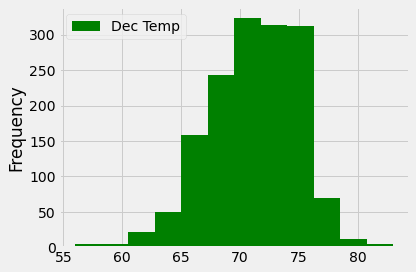

In [14]:
dec_temp_df.plot.hist(bins=12,color='green')
plt.tight_layout()
plt.savefig("./IMAGES/dec_hist.PNG")

In [22]:
# Write a query that filters the Measurement table to retrieve the precipitation for the month of June
june_prcp_list=[]
june_prcp_list=session.query(Measurement.date,Measurement.prcp).filter(func.extract("month", Measurement.date) == 6).all()

In [27]:
# 8. Create a DataFrame from the list of precipitaion for the month of December. 
june_prcp_df=pd.DataFrame(june_prcp_list,columns=['June','June Precipitation'])
june_prcp_df.set_index(june_prcp_df['June'], inplace = True)

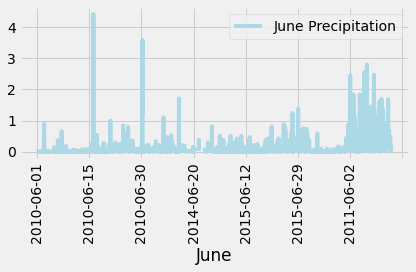

In [28]:
june_prcp_df.plot(color='lightblue')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("./IMAGES/june_prec.PNG")

In [29]:
# Write a query that filters the Measurement table to retrieve the precipitation for the month of December
dec_prcp_list=[]
mon_str="12"
dec_prcp_list=session.query(Measurement.date,Measurement.prcp).filter(func.extract("month", Measurement.date) == 12).all()

In [30]:
# 8. Create a DataFrame from the list of precipitaion for the month of December. 
dec_prcp_df=pd.DataFrame(dec_prcp_list,columns=['December','Dec Precipitation'])
dec_prcp_df.set_index(dec_prcp_df['December'], inplace = True)

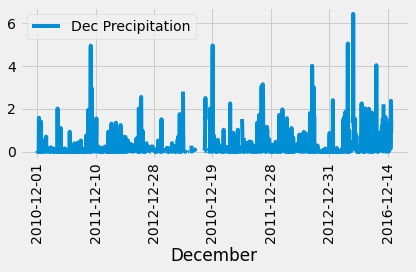

In [31]:
dec_prcp_df.plot()
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("./IMAGES/dec_prec.PNG")